In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Parte I - Resolvendo um Problema Linearmente Separável

In [2]:
data = np.fromfile('data/data/dataAll.txt')
N = 3
saidas_a=[]
d_data = [data[n:n+N].tolist() for n in range(0, len(data), N)]
for i in d_data:
    saidas_a.append(i[-1])
    i.pop()
entradas_a = d_data
graf_x = entradas_a
graf_y = saidas_a



entradas = entradas_a
total_entradas = len(entradas)
saidas = saidas_a
f = 0
w0 = -1
apz = 0.1
pesos = []
p0 = []
for i in range(3):
            p0.append(random.uniform(-0.5,0.5))
w0  = np.array(w0)


print('Vetor de pesos Iniciais:',p0)

for entrada in entradas:
    entrada.insert(0, -1)
entradas = np.array(entradas)

Vetor de pesos Iniciais: [-0.3959063027778794, -0.01926658279875082, -0.42921527169850326]


In [3]:
def activate(x):
    if x>0:
        return 1.0
    else:
        return 0.0

In [4]:
epcs = 0
ajustes = 0
while True:
    erro = False
    
    for i in range(total_entradas): 
        
        u = 0
        u = u + (np.vdot(entradas[i],p0))
        y = activate(u)
        
        if saidas[i]-y!=0.0:
            erro_aux = saidas[i]-y
            p0 = p0+(0.1*erro_aux*(entradas[i]))
            ajustes += 1
            #print(p0)
            pesos.append(p0)
            erro = True
    epcs+=1
    if not erro:
        break

print('a) Alterações no vetor de Pesos:',ajustes)
print('Ultimo Vetor de Pesos: ',p0)
print('------------------------------------------')
print("b) Números de épocas até a convergência:",epcs)
print('------------------------------------------')

a) Alterações no vetor de Pesos: 184
Ultimo Vetor de Pesos:  [  -3.1959063   595.60376342 -593.35142527]
------------------------------------------
b) Números de épocas até a convergência: 16
------------------------------------------


c) Gráfico gerado


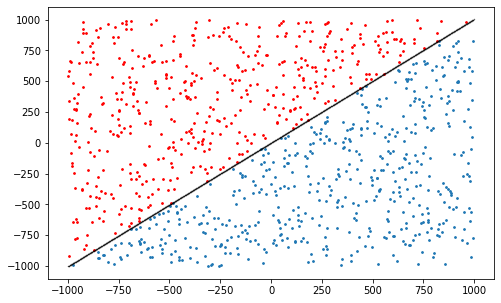

In [5]:
plot_x_1 = []
plot_y_1 = []
plot_x_0 = []
plot_y_0 = []

plt.figure(figsize=(8,5))

for i in range (0,1000):
    if saidas_a[i]==1.0:
        plot_x_1.append(entradas_a[i][1])
        plot_y_1.append(entradas_a[i][2])
    else:
        plot_x_0.append(entradas_a[i][1])
        plot_y_0.append(entradas_a[i][2])
        
x = plot_x_1
y = plot_y_1
a = plot_x_0
b = plot_y_0

plt.scatter(x,y,s=3,alpha=1)
plt.scatter(a,b,s=3,alpha=1, c='red')
#plt.plot(x, y, 'bo')
#plt.plot(a, b, 'ro')


aaaa=[]
bbbb = []
for i in range(-(total_entradas),total_entradas):
    aaaa.append(i)
    bbbb.append((p0[0]/p0[2])-(p0[1]/p0[2])*i)
    
#plt.plot(aaaa, bbbb,'black')
plt.scatter(aaaa,bbbb,s=0.1,alpha=0.5, c='black')

print('c) Gráfico gerado')

plt.show()  